<a href="https://colab.research.google.com/github/vamseekrishnakasani/Spam_classifier/blob/main/spam_detection_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.decomposition import PCA
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# Dataset Url from UCI

dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"

In [ ]:
# Load the dataset from a file using NumPy
dataset = np.loadtxt(dataset_url, dtype='float', delimiter=',') # dataset is a 2D array

num_samples = dataset.shape[0]  # Number of rows (data points)
num_features = dataset.shape[1] - 1  # Number of features (excluding target column)

# Display dataset information
print(f"number of data points is {num_samples}")
print(f"number of features is {num_features}")

# Extract feature matrix (X) and target values (Y)
X = dataset[:, :-1]  # Select all columns except the last as features
Y = dataset[:, -1]   # Select the last column as target labels

# Display the first sample's feature vector and its corresponding label
print("Feature vector of the first sample:\n", X[0])
print("Label of the first sample:", Y[0])

number of data points is 4601
number of features is 57
Feature vector of the first sample:
 [  0.      0.64    0.64    0.      0.32    0.      0.      0.      0.
   0.      0.      0.64    0.      0.      0.      0.32    0.      1.29
   1.93    0.      0.96    0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.778   0.      0.
   3.756  61.    278.   ]
Label of the first sample: 1.0


In [ ]:
# data propressing, and split dataset into training set and testing set:

# Normalize features using StandardScaler (zero mean, unit variance)
X_normalized = StandardScaler().fit_transform(X)

# Encode labels if they are categorical
Y_encoded = LabelEncoder().fit_transform(Y)

# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, Y_encoded, test_size = 0.3, random_state = 0)


In [ ]:
# Display dataset information
print(f"Total data points: {num_samples}")
print(f"Number of features: {num_features}")
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Display an example from training data
print("First training sample (normalized features):\n", X_train[0])
print("First training sample's encoded label:", y_train[0])

Total data points: 4601
Number of features: 57
Training set size: 3220
Testing set size: 1381
First training sample (normalized features):
 [-0.34243371  5.26720508 -0.55676058 -0.04689958 -0.4643144  -0.35026618
 -0.29179389 -0.26256156 -0.32330236 -0.37136439 -0.29685953 -0.62871259
 -0.31205521 -0.17492717 -0.19011441 -0.3013776  -0.32113541 -0.34787592
  0.04951336 -0.16789311  0.78308927 -0.11817151 -0.2902092  -0.21299439
 -0.32881467 -0.29923993  0.81162912 -0.23183016 -0.16673145 -0.22523952
 -0.16053931 -0.14321202 -0.17492026 -0.14521515 -0.19806739 -0.24213022
  3.80969955 -0.05983624 -0.18091134 -0.18530385 -0.12090468 -0.17259996
  7.61392699 -0.12734332  1.43219543 -0.19738748 -0.0713879  -0.11154623
 -0.15845336 -0.51430655 -0.15519768 -0.32991229 -0.30835494  0.56315948
 -0.10608066 -0.20101998 -0.39798197]
First training sample's encoded label: 0


In [ ]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [ ]:
# Display dataset information
print(f"Total data points: {num_samples}")
print(f"Number of features: {num_features}")
print(f"Feature's Training set size: {X_train_tensor.shape}")
print(f"Label's Training set size: {y_train_tensor.shape}")
print(f"Feature's Testing set size: {X_test_tensor.shape}")

# Display an example from training data
print("First training sample (PyTorch tensor features):\n", X_train_tensor[0])
print("First training sample's encoded label (PyTorch tensor):", y_train_tensor[0])

Total data points: 4601
Number of features: 57
Feature's Training set size: torch.Size([3220, 57])
Label's Training set size: torch.Size([3220, 1])
Feature's Testing set size: torch.Size([1381, 57])
First training sample (PyTorch tensor features):
 tensor([-0.3424,  5.2672, -0.5568, -0.0469, -0.4643, -0.3503, -0.2918, -0.2626,
        -0.3233, -0.3714, -0.2969, -0.6287, -0.3121, -0.1749, -0.1901, -0.3014,
        -0.3211, -0.3479,  0.0495, -0.1679,  0.7831, -0.1182, -0.2902, -0.2130,
        -0.3288, -0.2992,  0.8116, -0.2318, -0.1667, -0.2252, -0.1605, -0.1432,
        -0.1749, -0.1452, -0.1981, -0.2421,  3.8097, -0.0598, -0.1809, -0.1853,
        -0.1209, -0.1726,  7.6139, -0.1273,  1.4322, -0.1974, -0.0714, -0.1115,
        -0.1585, -0.5143, -0.1552, -0.3299, -0.3084,  0.5632, -0.1061, -0.2010,
        -0.3980])
First training sample's encoded label (PyTorch tensor): tensor([0.])


In [ ]:
# Define a PyTorch dataset class for using pytorch DataLoader
class MyDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]


In [ ]:
# Create dataset instances for training and testing
train_dataset = MyDataset(X_train_tensor, y_train_tensor)
test_dataset = MyDataset(X_test_tensor, y_test_tensor)

# Number of samples in a batch
batch_size = 64

# Create DataLoaders for batching and shuffling
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Print one samples from DataLoader
for batch_X, batch_Y in train_loader:
    print("Batch X (features):", batch_X.shape)
    print("Batch Y (labels):", batch_Y.shape)
    break

Batch X (features): torch.Size([64, 57])
Batch Y (labels): torch.Size([64, 1])


In [ ]:
# print for understanding:
print(len(train_loader)) # number of batches in train_dataset
print(len(train_loader.dataset)) # number of samples in train_dataset
print(len(test_loader)) # number of batches in test_dataset
print(len(test_loader.dataset)) # number of samples in test_dataset

51
3220
22
1381


In [ ]:
# Define a simple Logistic Regression model using pytorch's nn.Module
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__() # initialization of pytorch model
        self.linearFunction = nn.Linear(input_dim, 1) # linear function: input size is the 2nd dimension of X_train_tensor, i.e., 57 (# of columns), output size is 1

    def forward(self, x):
        logits = self.linearFunction(x)  # Linear transformation
        probabilities = torch.sigmoid(logits)  # Apply sigmoid activation for binary classification
        return probabilities


In [ ]:
# Instantiate the model
input_dim = X_train_tensor.shape[1]  # Number of features in dataset
model = LogisticRegressionModel(input_dim)

# Print model architecture
print(model)

LogisticRegressionModel(
  (linearFunction): Linear(in_features=57, out_features=1, bias=True)
)


In [ ]:
# Define loss function: the binary cross-entropy loss function
loss_func = nn.BCELoss()

learning_rate = 0.01

# Define the optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# A standard training loop:

def train_model(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    model.train()
    total_loss, correct = 0, 0

    # work through all batches in the dataloader:
    for batch, (X, y) in enumerate(dataloader):

        # Zero the previous gradients
        optimizer.zero_grad()

        # Compute prediction and loss
        y_pred = model(X)  # forward pass: compute the predicated y value
        loss = loss_fn(y_pred, y)

        # Backpropagation
        loss.backward()  # Backward pass: Compute gradient of the loss with respect to model parameters/weights

        # Update weights
        optimizer.step()

        total_loss += loss.item()

       # Compute training accuracy correctly
        predictions = (y_pred > 0.5).int()  # Convert probabilities to binary predictions
        correct += (predictions == y.int()).sum().item()  # Count correct predictions

        if batch % 10 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"training loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    train_loss = total_loss / len(dataloader)
    accuracy = (correct / size) * 100  # Convert to percentage

    return train_loss, accuracy  # Return average loss per batch


In [ ]:
# A standard testing loop:

def test_model(dataloader, model, loss_fn):
    # Set the model to evaluation mode, so we do not update weights - important for batch normalization and dropout layers
    model.eval()
    size = len(dataloader.dataset) # number of samples in test_loader
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    with torch.no_grad():
        for X, y in dataloader:
            y_pred = model(X)
            test_loss += loss_fn(y_pred, y).item()
            correct += ((y_pred > 0.5).int() == y.int()).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    accuracy = 100 * correct
    print(f"Test Error: \n Accuracy: {accuracy:>0.1f}%, Avg testing loss: {test_loss:>8f} \n")
    return test_loss, accuracy

In [ ]:
#invoke the training loop and testing loop:

epochs = 10  # repeat training/testing for 10 times
train_losses = []
train_accuracy = []
test_losses = []
test_accuracy = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loss, accuracy = train_model(train_loader, model, loss_func, optimizer)
    train_losses.append(train_loss)
    train_accuracy.append(accuracy)

    test_loss, accuracy = test_model(test_loader, model, loss_func)
    test_losses.append(test_loss)
    test_accuracy.append(accuracy)
print("Done!")

Epoch 1
-------------------------------
training loss: 0.707562  [   64/ 3220]
training loss: 0.733525  [  704/ 3220]
training loss: 0.670453  [ 1344/ 3220]
training loss: 0.639789  [ 1984/ 3220]
training loss: 0.586901  [ 2624/ 3220]
training loss: 0.545843  [ 3220/ 3220]
Test Error: 
 Accuracy: 76.2%, Avg testing loss: 0.580282 

Epoch 2
-------------------------------
training loss: 0.601252  [   64/ 3220]
training loss: 0.573252  [  704/ 3220]
training loss: 0.524470  [ 1344/ 3220]
training loss: 0.549365  [ 1984/ 3220]
training loss: 0.499089  [ 2624/ 3220]
training loss: 0.474282  [ 3220/ 3220]
Test Error: 
 Accuracy: 83.9%, Avg testing loss: 0.491627 

Epoch 3
-------------------------------
training loss: 0.449209  [   64/ 3220]
training loss: 0.487651  [  704/ 3220]
training loss: 0.448324  [ 1344/ 3220]
training loss: 0.518226  [ 1984/ 3220]
training loss: 0.483813  [ 2624/ 3220]
training loss: 0.483717  [ 3220/ 3220]
Test Error: 
 Accuracy: 87.6%, Avg testing loss: 0.441335 

In [ ]:
print("train losses: ", train_losses)
print("train accuracy: ", train_accuracy)
print("test losses: ", test_losses)
print("test accuracy: ", test_accuracy)

train losses:  [0.6546321394396764, 0.5227152664287418, 0.45395491462127835, 0.41168314276957046, 0.38286475866448644, 0.3624165391220766, 0.3483322227702421, 0.3359103652776456, 0.32619423141666487, 0.31843677484521676]
train accuracy:  [64.28571428571429, 80.74534161490683, 85.74534161490683, 88.13664596273291, 88.88198757763975, 89.22360248447205, 89.37888198757764, 89.65838509316771, 90.0, 90.12422360248448]
test losses:  [0.5802820324897766, 0.49162703075192193, 0.4413352622227235, 0.4091217030178417, 0.38688978959213605, 0.3706459958444942, 0.35821672596714715, 0.3484804169698195, 0.34066891399296845, 0.33408942141316156]
test accuracy:  [76.24909485879797, 83.8522809558291, 87.61766835626358, 88.7762490948588, 89.35553946415641, 89.2831281679942, 89.64518464880521, 89.71759594496741, 89.86241853729182, 90.22447501810282]


In [ ]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score

# call a different ML model, and train the model using our training dataset:
myModel = linear_model.LogisticRegression(random_state=0).fit(X_train, y_train)

# Predict and compare accuracy
sklearn_pred = myModel.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, sklearn_pred)

In [ ]:
print(f"PyTorch Model Accuracy: {test_accuracy[-1]:.2f}%")
print(f"Scikit-Learn Model Accuracy: {sklearn_accuracy * 100:.2f}%")

PyTorch Model Accuracy: 90.22%
Scikit-Learn Model Accuracy: 90.80%


In [ ]:
# get predicted y value for the 15-th email:
predictedY = myModel.predict(X_test[15:16]) # 1:2 means items at index 1 (up to index 2, does not include item at index 2)
print("predicted y: ", predictedY)

print("true y: ", y_test[15])  # true y for this item

predicted y:  [0]
true y:  0


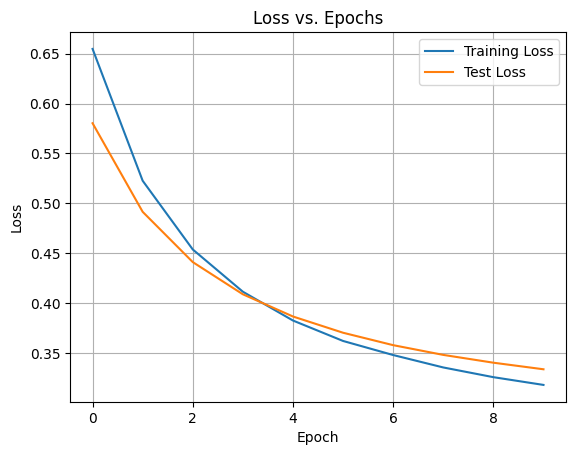

In [ ]:
# Train and Test Loss over epochs
plt.plot(range(epochs), train_losses, label="Training Loss")
plt.plot(range(epochs), test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epochs")
plt.legend()
plt.grid(True)
plt.show()

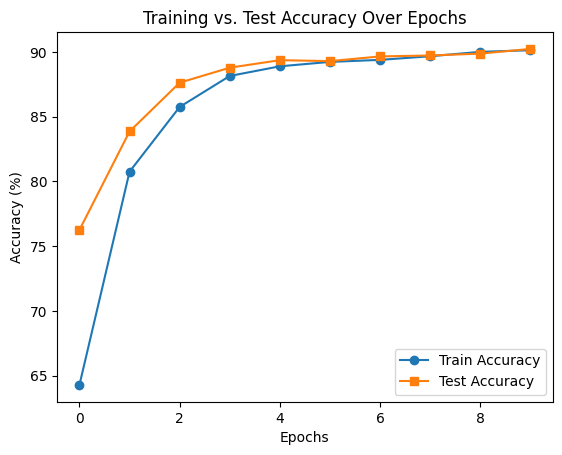

In [ ]:
# Training and Testing Accuracy over Epochs
plt.plot(range(epochs), train_accuracy, marker='o', label="Train Accuracy")
plt.plot(range(epochs), test_accuracy, marker='s', label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training vs. Test Accuracy Over Epochs")
plt.legend()
plt.show()

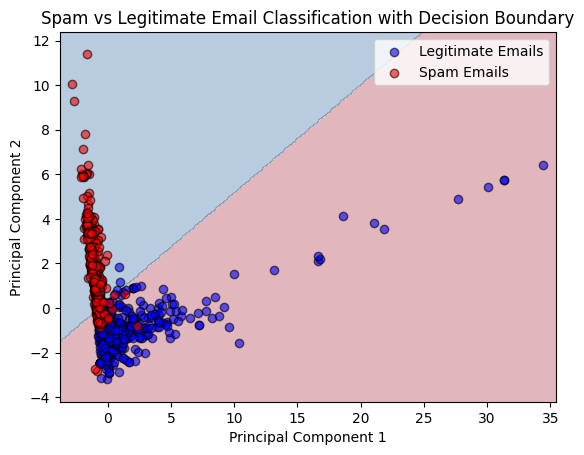

In [ ]:
# Classifier marks spam emails and legitimate emails with different colors

model.eval()  # Set model to evaluation mode

# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_tensor.numpy())

# Create mesh grid for decision boundary
xx, yy = np.meshgrid(
    np.linspace(X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1, 300),
    np.linspace(X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1, 300)
)

# Prepare mesh grid points for prediction
grid_tensor = torch.tensor(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]), dtype=torch.float32)

# Single model call for both test data and mesh grid predictions
with torch.no_grad():
    y_pred = (model(X_test_tensor) > 0.5).int().numpy().flatten()  # Predictions for test emails
    grid_predictions = (model(grid_tensor) > 0.5).int().numpy().reshape(xx.shape)  # Predictions for decision boundary

# Plot decision boundary
plt.contourf(xx, yy, grid_predictions, alpha=0.3, cmap=plt.cm.RdBu)

# Plot spam vs legitimate emails
plt.scatter(X_test_pca[y_pred == 0, 0], X_test_pca[y_pred == 0, 1], color='blue', label='Legitimate Emails', alpha=0.6, edgecolors='k')
plt.scatter(X_test_pca[y_pred == 1, 0], X_test_pca[y_pred == 1, 1], color='red', label='Spam Emails', alpha=0.6, edgecolors='k')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Spam vs Legitimate Email Classification with Decision Boundary')
plt.legend()
plt.show()

training loss: 0.782218  [   64/ 3220]
training loss: 0.804160  [  704/ 3220]
training loss: 0.764751  [ 1344/ 3220]
training loss: 0.760719  [ 1984/ 3220]
training loss: 0.815811  [ 2624/ 3220]
training loss: 0.902358  [ 3220/ 3220]
training loss: 0.789156  [   64/ 3220]
training loss: 0.756969  [  704/ 3220]
training loss: 0.703775  [ 1344/ 3220]
training loss: 0.782493  [ 1984/ 3220]
training loss: 0.736786  [ 2624/ 3220]
training loss: 0.892086  [ 3220/ 3220]
training loss: 0.728423  [   64/ 3220]
training loss: 0.750366  [  704/ 3220]
training loss: 0.727052  [ 1344/ 3220]
training loss: 0.729929  [ 1984/ 3220]
training loss: 0.767464  [ 2624/ 3220]
training loss: 0.676633  [ 3220/ 3220]
training loss: 0.781323  [   64/ 3220]
training loss: 0.683617  [  704/ 3220]
training loss: 0.680772  [ 1344/ 3220]
training loss: 0.665014  [ 1984/ 3220]
training loss: 0.663011  [ 2624/ 3220]
training loss: 0.740515  [ 3220/ 3220]
training loss: 0.673179  [   64/ 3220]
training loss: 0.635929  

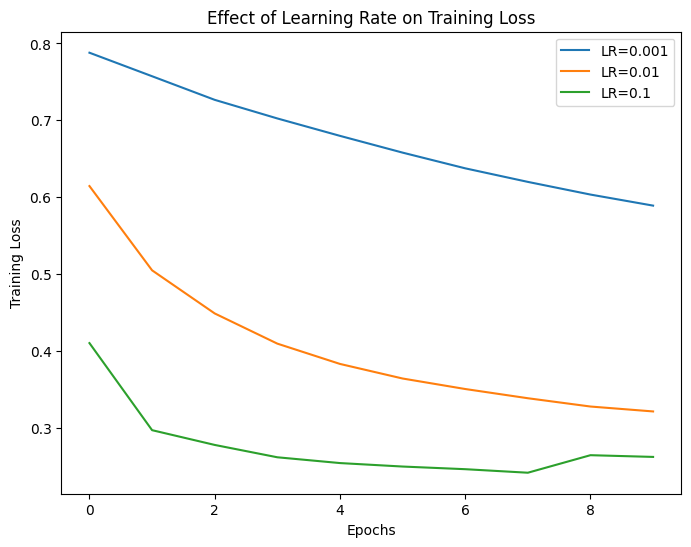

In [ ]:
# Best Learning Rates and their training losses

learning_rates = [0.001, 0.01, 0.1]
losses_per_lr = {}

for lr in learning_rates:
    model = LogisticRegressionModel(input_dim)  # Initialize model
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    train_losses = []
    for epoch in range(epochs):
        train_loss, train_accuracy = train_model(train_loader, model, loss_func, optimizer)
        train_losses.append(train_loss)

    losses_per_lr[lr] = train_losses

# Ensure only one plot instance
plt.figure(figsize=(8, 6))

# Plot Loss vs Learning Rate
for lr, losses in losses_per_lr.items():
    plt.plot(range(epochs), losses, label=f"LR={lr}")

plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Effect of Learning Rate on Training Loss")
plt.legend()
plt.show()